In [23]:
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('AirPassenger.csv')

In [5]:
df.head()

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


In [6]:
df.tail()

,Year-Month,Pax
139,1960-Aug,606
140,1960-Sep,508
141,1960-Oct,461
142,1960-Nov,390
143,1960-Dec,432


In [8]:
#Check data types
df.dtypes

Year-Month    object
Pax            int64
dtype: object

Year-Month column is not seen as a date object

In [10]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'])

In [11]:
df.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

Now the time series reference is approprately identified.

In [13]:
#It is recommended that we make our time series reference as the index
df = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')

In [14]:
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
df.tail()

,Pax
Year-Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [16]:
#We can conveniently do slicing i.e. obtain data for a specific time period.
df['1951-04-01':'1952-03-01']

,Pax
Year-Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


<AxesSubplot:xlabel='Year-Month'>

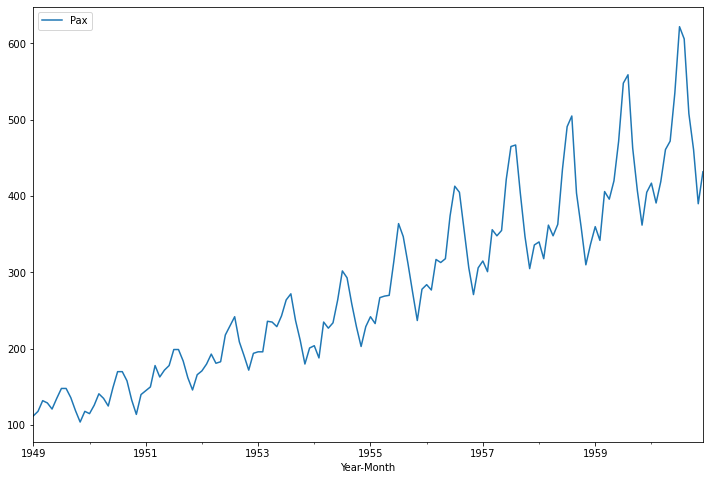

In [19]:
#Plot the time series
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()

We see an increasing trend and seasonality which is not constant in nature.

In [24]:
#Decompose the time series additively
df_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)

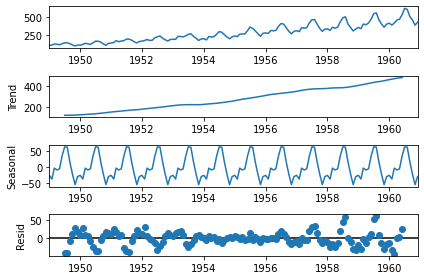

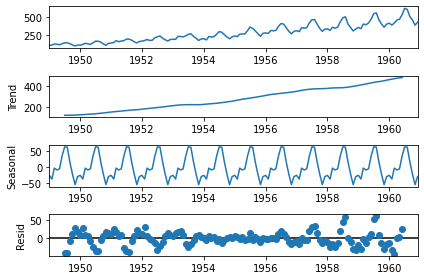

In [25]:
df_add_decompose.plot()

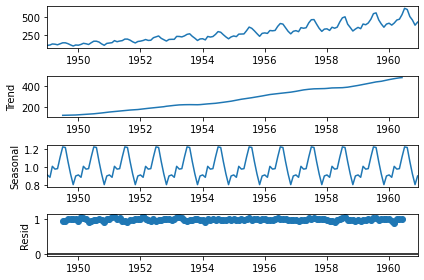

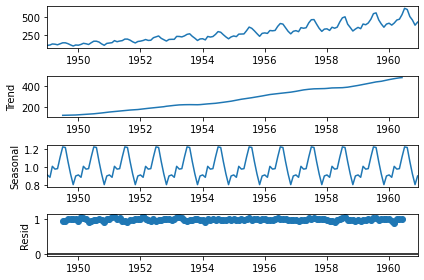

In [26]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()

In [32]:
#Let's try to do log transformation
df_log = df1.copy()

In [33]:
df_log['Pax'] = np.log(df1)

In [34]:
df_log.Pax

Year-Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

<AxesSubplot:xlabel='Year-Month'>

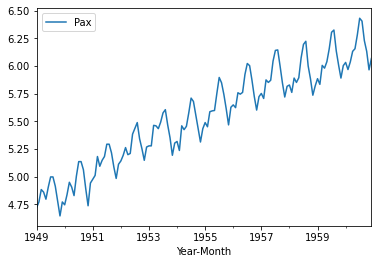

In [35]:
#Visualize the log transformed series
df1_log.plot()


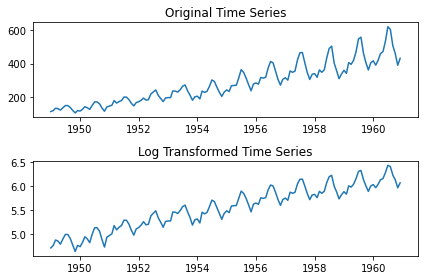

In [36]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()

# Downsampling



In [37]:
#Let's change the monthly series to quarterly. This would require aggregation.
df_q = df.resample('Q').mean()

<AxesSubplot:xlabel='Year-Month'>

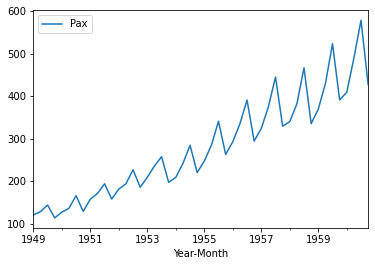

In [39]:
df_q.plot()

# Upsampling

In [40]:
#Let's change the monthly series to daily. 
df_d = df.resample('D').ffill()

In [41]:
df_d['1949-02']

,Pax
Year-Month,
1949-02-01,118
1949-02-02,118
1949-02-03,118
1949-02-04,118
1949-02-05,118
1949-02-06,118
1949-02-07,118
1949-02-08,118
1949-02-09,118


<AxesSubplot:xlabel='Year-Month'>

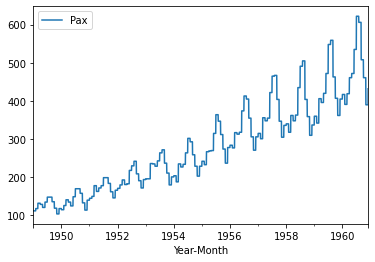

In [42]:
df_d.plot()

In [43]:
#Let's change the monthly series to hourly. 
df_h = df.resample('H').interpolate()

In [45]:
df_h

,Pax
Year-Month,
1949-01-01 00:00:00,112.000000
1949-01-01 01:00:00,112.008065
1949-01-01 02:00:00,112.016129
1949-01-01 03:00:00,112.024194
1949-01-01 04:00:00,112.032258
...,...
1960-11-30 20:00:00,431.766667
1960-11-30 21:00:00,431.825000
1960-11-30 22:00:00,431.883333


<AxesSubplot:xlabel='Year-Month'>

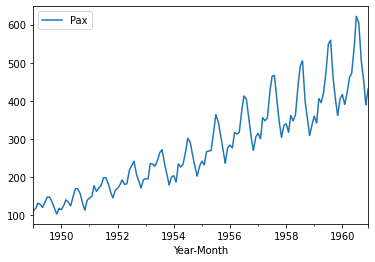

In [46]:
df_h.plot()